In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### Power method and its variants 

In [2]:
def power(A, maxiter = 1000, tol = 1.e-3):
    
    n  = A.shape[0]
    xkm1 = np.random.randn(n)
    
    thetahist = []
    reshist = []
    
    for k in range(1000):
        y = A @ xkm1
        xk = y/np.linalg.norm(y)
        xkm1 = xk
        
        #Approximate eigenvalue
        theta = np.inner(xk, A @ xk)
        
        #Residual history
        thetahist.append(theta)
        res = np.linalg.norm(A @ xk - theta * xk)
        reshist.append(res)
        if res < tol:
            break
            
        
        
    return reshist, thetahist

We illustrate the performance of power method on a simple example

$$ A =\begin{bmatrix} 2 & 1 & 1 \\ 1 & 3 & 1 \\ 1 & 1 & 4 \end{bmatrix} .$$

In [3]:
A = np.array([[2, 1, 1],[ 1, 3, 1], [1, 1, 4]])
l, v  = np.linalg.eig(A)
print("Eigenvalues of A", l)

Eigenvalues of A [5.21431974 1.32486913 2.46081113]


Text(0.5, 1.0, 'Convergence of residual')

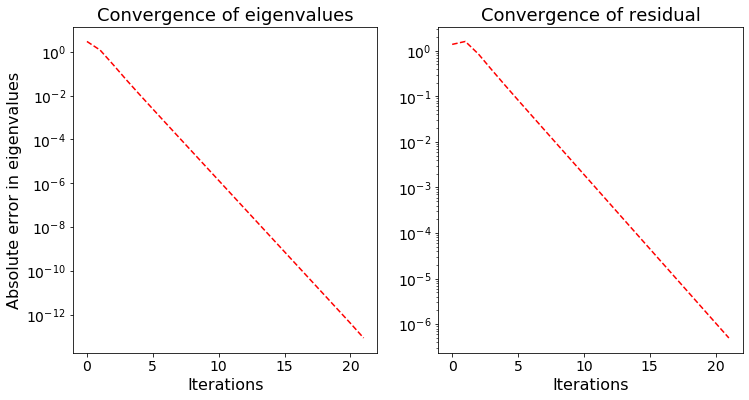

In [4]:
lmax = np.max(l)

reshist, thetahist = power(A, maxiter = 1000, tol = 1.e-6)


f, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))
ax1.semilogy(np.abs(lmax-np.array(thetahist)), 'r--')
ax1.set_xlabel('Iterations', fontsize = 16)
ax1.set_ylabel('Absolute error in eigenvalues', fontsize = 16)
ax1.set_title('Convergence of eigenvalues', fontsize = 18)

ax2.semilogy(reshist, 'r--')
ax2.set_xlabel('Iterations', fontsize = 16)
ax2.set_title('Convergence of residual', fontsize = 18)

We consider another simple matrix 

$$ B = I + \alpha \frac{uu^\top}{u^\top u}  \qquad \alpha > 0,$$
which has the eigenvalues $1+\alpha, 1,\dots,1$. The parameter $\alpha$ controls the gap between the first and the second eigenvalues. 

Text(0.5, 1.0, 'Convergence of power method')

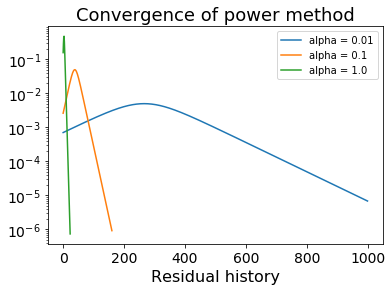

In [5]:
n = 100
u = np.random.randn(n)
for logalpha in np.arange(-2,1):
    alpha = 10**float(logalpha)
    B = np.eye(n) + alpha*np.outer(u,u)/np.inner(u,u)
    
    reshist,thetahist = power(B, tol = 1.e-6)
    plt.semilogy(reshist, label = 'alpha = ' + str(alpha))
    
plt.xlabel('Residual history', fontsize = 16)
plt.legend()
plt.title('Convergence of power method', fontsize = 18)

### Rayleigh Quotient iteration


In [6]:
def rqi(A, maxiter = 1000, tol = 1.e-3):
    """
    Implements Rayleigh quotient iteration
    
    """
    
    
    n  = A.shape[0]
    xkm1 = np.random.randn(n)
    
    thetahist = []
    reshist = []
    
    theta = np.inner(xkm1, A @ xkm1)/np.inner(xkm1,xkm1)
    
    for k in range(1000):
        y = np.linalg.solve(A-theta*np.eye(n), xkm1)
        xk = y/np.linalg.norm(y)
        xkm1 = xk
        
        #Approximate eigenvalue
        theta = np.inner(xk, A @ xk)
        
        #Residual history
        thetahist.append(theta)
        res = np.linalg.norm(A @ xk - theta * xk)
        reshist.append(res)
        if res < tol:
            break
        
        
    return reshist, thetahist

We demonstrate the performance on the matrix $A$ from above.

Eigenvalues of A [5.21431974 1.32486913 2.46081113]


Text(0.5, 1.0, 'Convergence of residual')

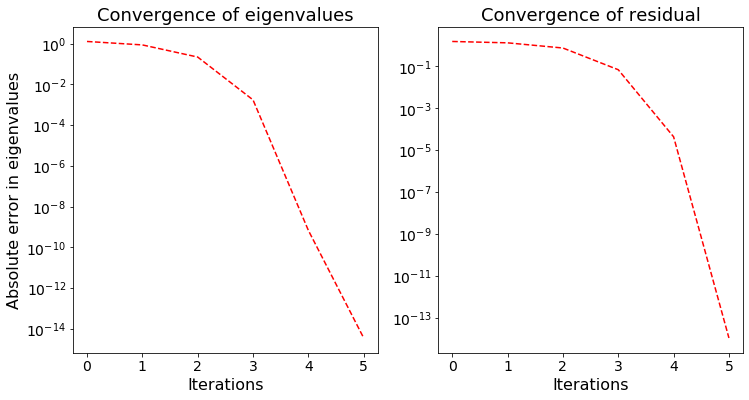

In [7]:
A = np.array([[2, 1, 1],[ 1, 3, 1], [1, 1, 4]])
l, v  = np.linalg.eig(A)
print("Eigenvalues of A", l)

reshist, thetahist = rqi(A, maxiter = 1000, tol = 1.e-6)

f, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))
ax1.semilogy(np.abs(lmax-np.array(thetahist)), 'r--')
ax1.set_xlabel('Iterations', fontsize = 16)
ax1.set_ylabel('Absolute error in eigenvalues', fontsize = 16)
ax1.set_title('Convergence of eigenvalues', fontsize = 18)

ax2.semilogy(reshist, 'r--')
ax2.set_xlabel('Iterations', fontsize = 16)
ax2.set_title('Convergence of residual', fontsize = 18)

Rayleigh quotient iteration converges very fast! Consider the second matrix 

$$ B = I + \alpha \frac{uu^\top}{u^\top u}  \qquad \alpha > 0.$$

We apply Rayleigh quotient iteration and vary $\alpha$.

Text(0.5, 1.0, 'Convergence of RQI')

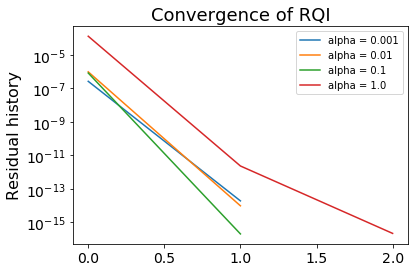

In [9]:
n = 100
u = np.random.randn(n)
for logalpha in np.arange(-3,1):
    alpha = 10**float(logalpha)
    B = np.eye(n) + alpha*np.outer(u,u)/np.inner(u,u)
    
    reshist,thetahist = rqi(B, tol = 1.e-12)
    plt.semilogy(reshist, label = 'alpha = ' + str(alpha))
        

plt.ylabel('Residual history', fontsize = 16)
plt.legend()
plt.title('Convergence of RQI', fontsize = 18)